**Background**

Im Jahr 2020 sind die Verkehrsunfälle zurück gegangen, was aber grösstenteils der Corona Pandemie zu verdanken ist. – 
Insbesondere bei Unfällen bei denen Fahrräder beteiligt waren, ist der Rückgang jedoch nicht feststellbar. 
Bei 4 von 5 Todesfällen waren Fahrradfahrer betroffen. 
Massnahmen für Verkehrssicherheit sind deshalb wichtiger den je.

**Business Case**

Anhand von Verkehrszählungen und der Unfallstatistik, soll herausgefunden werden, wo die Hotspots für solche Sicherheits fördernden und Verkehrsaufkommen reduzierende Massnahmen sind.
Die Analyse der Unfallursache und dem zugehörigen Unfallort, könnte dazu dienen präventive „Werbung“ anzubringen.


In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!pip install matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

mpl.style.use('ggplot')

# 1) Datensätze einlesen

In [3]:
df_verkehrszaehlung_2020 = pd.read_csv('./data/verkehrszaehlung_2020_mit_quartier_kreis.csv')
df_verkehrsunfaelle_2020 = pd.read_csv('./data/verkehrsunfaelle_2020_mit_quartier_kreis.csv')

In [4]:
df_verkehrszaehlung_2020.head()

,Unnamed: 0,MSID,MessungDatum,ZeitKategorie,MSName,ZSID,ZSName,Achse,HNr,Hoehe,EKoord,NKoord,Richtung,Knummer,Kname,AnzDetektoren,D1ID,D2ID,D3ID,D4ID,MessungDatZeit,LieferDat,AnzFahrzeuge,AnzFahrzeugeStatus,MessungZeit,Koord_WGS84_E,Koord_WGS84_N,Jahr,Monat,Tag,Wochentag,MonatText,Jahreszeit,Verkehrsaufkommen,Kreis
0,0,Z001M001,2020-01-01,Nacht,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,2683009.89,1243936.2,auswärts,789.0,Badanstalt Wollishofen,1.0,2.0,Unbekannt,Unbekannt,Unbekannt,2020-01-01 00:00:00,2021-02-04,1061.0,Gemessen,00:00:00,47.341059,8.537068,2020.0,1.0,2.0,Mittwoch,Januar,Winter,Gering,Kreis 2
1,1,Z001M001,2020-01-01,Rushhour_Morgen,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,2683009.89,1243936.2,auswärts,789.0,Badanstalt Wollishofen,1.0,2.0,Unbekannt,Unbekannt,Unbekannt,2020-01-01 07:00:00,2021-02-04,441.0,Gemessen,07:00:00,47.341059,8.537068,2020.0,1.0,2.0,Mittwoch,Januar,Winter,Gering,Kreis 2
2,2,Z001M001,2020-01-01,Nachmittag,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,2683009.89,1243936.2,auswärts,789.0,Badanstalt Wollishofen,1.0,2.0,Unbekannt,Unbekannt,Unbekannt,2020-01-01 13:00:00,2021-02-04,1241.0,Gemessen,13:00:00,47.341059,8.537068,2020.0,1.0,2.0,Mittwoch,Januar,Winter,Gering,Kreis 2
3,3,Z001M001,2020-01-01,Rushhour_Abend,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,2683009.89,1243936.2,auswärts,789.0,Badanstalt Wollishofen,1.0,2.0,Unbekannt,Unbekannt,Unbekannt,2020-01-01 19:00:00,2021-02-04,589.0,Gemessen,19:00:00,47.341059,8.537068,2020.0,1.0,2.0,Mittwoch,Januar,Winter,Gering,Kreis 2
4,4,Z001M001,2020-01-02,Nacht,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,2683009.89,1243936.2,auswärts,789.0,Badanstalt Wollishofen,1.0,2.0,Unbekannt,Unbekannt,Unbekannt,2020-01-02 00:00:00,2021-02-04,173.0,Gemessen,00:00:00,47.341059,8.537068,2020.0,1.0,3.0,Donnerstag,Januar,Winter,Gering,Kreis 2


In [5]:
df_verkehrsunfaelle_2020.head()

,AccidentUID,Quartier,AccidentType,AccidentType_de,AccidentSeverityCategory,AccidentSeverityCategory_de,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType,RoadType_de,AccidentLocation_CHLV95_E,AccidentLocation_CHLV95_N,CantonCode,MunicipalityCode,AccidentYear,AccidentMonth,AccidentMonth_de,AccidentWeekDay,AccidentWeekDay_de,AccidentHour,AccidentHour_text,AccidentLocation_WGS84_E,AccidentLocation_WGS84_N,Kreis,Jahreszeit,ZeitKategorie
0,9CCA869C93E0DA25E05329B9D80AF2FB,8057,at0,Schleuder- oder Selbstunfall,as3,Unfall mit Leichtverletzten,False,True,False,rt433,Nebenstrasse,2683236,1249583,ZH,261,2020,1,Januar,aw403,Mittwoch,4.0,04h-05h,47.391814,8.541109,Kreis 6,Winter,Nacht
1,9E7139B16D85C771E05329B9D80A926E,8090,at8,Fussgängerunfall,as3,Unfall mit Leichtverletzten,True,False,False,rt433,Nebenstrasse,2682964,1248220,ZH,261,2020,1,Januar,aw403,Mittwoch,5.0,05h-06h,47.379590,8.537254,Kreis 5,Winter,Nacht
2,9E7139B167FDC771E05329B9D80A926E,8021,at1,Überholunfall oder Fahrstreifenwechsel,as4,Unfall mit Sachschaden,False,True,False,rt433,Nebenstrasse,2682811,1247444,ZH,261,2020,1,Januar,aw403,Mittwoch,5.0,05h-06h,47.372631,8.535085,Kreis 1,Winter,Nacht
3,A235C3252D0E9903E05328B9D80AFCE5,8048,at0,Schleuder- oder Selbstunfall,as4,Unfall mit Sachschaden,False,False,False,rt433,Nebenstrasse,2679166,1248512,ZH,261,2020,1,Januar,aw403,Mittwoch,12.0,12h-13h,47.382684,8.487018,Kreis 9,Winter,Morgen
4,9EC134679786BAC8E05329B9D80A310C,8004,at7,Parkierunfall,as4,Unfall mit Sachschaden,False,False,False,rt433,Nebenstrasse,2682395,1248019,ZH,261,2020,1,Januar,aw403,Mittwoch,14.0,14h-15h,47.377854,8.529684,Kreis 4,Winter,Nachmittag


## 1.1) Datensätze joinen

In [6]:
df_temp = df_verkehrszaehlung_2020.groupby(by=["Kreis","Jahr","MonatText","Wochentag","ZeitKategorie"]).sum()
df_temp.head(10)

Unnamed: 0        EKoord  \
Kreis   Jahr   MonatText Wochentag  ZeitKategorie                               
Kreis 1 2020.0 April     Dienstag   Nachmittag         11037312  2.468612e+08   
                                    Nacht              11037128  2.468612e+08   
                                    Rushhour_Abend     11037404  2.468612e+08   
                                    Rushhour_Morgen    11037220  2.468612e+08   
                         Donnerstag Nachmittag         13795950  3.085765e+08   
                                    Nacht              13795720  3.085765e+08   
                                    Rushhour_Abend     13796065  3.085765e+08   
                                    Rushhour_Morgen    13795835  3.085765e+08   
                         Freitag    Nachmittag         11035840  2.468612e+08   
                                    Nacht              11035656  2.468612e+08   

                                                           NKoord  Knummer  \
Kreis   Jahr   MonatText Wochentag  ZeitKategorie                            
Kreis 1 2020.0 April     Dienstag   Nachmittag       1.147708e+08  36356.0   
                                    Nacht            1.147708e+08  36356.0   
                                    Rushhour_Abend   1.147708e+08  36356.0   
                                    Rushhour_Morgen  1.147708e+08  36356.0   
                         Donnerstag Nachmittag       1.434634e+08  45445.0   
                                    Nacht            1.434634e+08  45445.0   
                                    Rushhour_Abend   1.434634e+08  45445.0   
                                    Rushhour_Morgen  1.434634e+08  45445.0   
                         Freitag    Nachmittag       1.147708e+08  36356.0   
                                    Nacht            1.147708e+08  36356.0   

                                                     AnzDetektoren    D1ID  \
Kreis   Jahr   MonatText Wochentag  ZeitKategorie                            
Kreis 1 2020.0 April     Dienstag   Nachmittag               136.0  1284.0   
                                    Nacht                    136.0  1284.0   
                                    Rushhour_Abend           136.0  1284.0   
                                    Rushhour_Morgen          136.0  1284.0   
                         Donnerstag Nachmittag               170.0  1605.0   
                                    Nacht                    170.0  1605.0   
                                    Rushhour_Abend           170.0  1605.0   
                                    Rushhour_Morgen          170.0  1605.0   
                         Freitag    Nachmittag               136.0  1284.0   
                                    Nacht                    136.0  1284.0   

                                                     AnzFahrzeuge  \
Kreis   Jahr   MonatText Wochentag  ZeitKategorie                   
Kreis 1 2020.0 April     Dienstag   Nachmittag           235527.0   
                                    Nacht                 51186.0   
                                    Rushhour_Abend        62910.0   
                                    Rushhour_Morgen      226321.0   
                         Donnerstag Nachmittag           302626.0   
                                    Nacht                 64255.0   
                                    Rushhour_Abend        91785.0   
                                    Rushhour_Morgen      284290.0   
                         Freitag    Nachmittag           215096.0   
                                    Nacht                 41956.0   

                                                     Koord_WGS84_E  \
Kreis   Jahr   MonatText Wochentag  ZeitKategorie                    
Kreis 1 2020.0 April     Dienstag   Nachmittag         4358.329776   
                                    Nacht              4358.329776   
                                    Rushhour_Abend     4358.329776   
                           

In [7]:
df_temp = df_temp.loc[:, df_temp.columns.intersection(['AnzFahrzeuge'])]
df_temp = df_temp.reset_index()
df_temp.head()

,Kreis,Jahr,MonatText,Wochentag,ZeitKategorie,AnzFahrzeuge
0,Kreis 1,2020.0,April,Dienstag,Nachmittag,235527.0
1,Kreis 1,2020.0,April,Dienstag,Nacht,51186.0
2,Kreis 1,2020.0,April,Dienstag,Rushhour_Abend,62910.0
3,Kreis 1,2020.0,April,Dienstag,Rushhour_Morgen,226321.0
4,Kreis 1,2020.0,April,Donnerstag,Nachmittag,302626.0


In [11]:
df_temp2 = df_verkehrsunfaelle_2020.groupby(by=["Kreis","AccidentYear","AccidentMonth_de","AccidentWeekDay_de","ZeitKategorie"]).count()
df_temp2.head(10)

AccidentUID  \
Kreis   AccidentYear AccidentMonth_de AccidentWeekDay_de ZeitKategorie                  
Kreis 1 2020         April            Dienstag           Abend                      1   
                                                         Nachmittag                 1   
                                                         Rushhour_Morgen            4   
                                      Donnerstag         Abend                      1   
                                                         Morgen                     2   
                                                         Nachmittag                 2   
                                                         Rushhour_Abend             2   
                                                         Rushhour_Morgen            1   
                                      Freitag            Rushhour_Abend             1   
                                      Mittwoch           Morgen                     3   

                                                                          Quartier  \
Kreis   AccidentYear AccidentMonth_de AccidentWeekDay_de ZeitKategorie               
Kreis 1 2020         April            Dienstag           Abend                   1   
                                                         Nachmittag              1   
                                                         Rushhour_Morgen         4   
                                      Donnerstag         Abend                   1   
                                                         Morgen                  2   
                                                         Nachmittag              2   
                                                         Rushhour_Abend          2   
                                                         Rushhour_Morgen         1   
                                      Freitag            Rushhour_Abend          1   
                                      Mittwoch           Morgen                  3   

                                                                          AccidentType  \
Kreis   AccidentYear AccidentMonth_de AccidentWeekDay_de ZeitKategorie                   
Kreis 1 2020         April            Dienstag           Abend                       1   
                                                         Nachmittag                  1   
                                                         Rushhour_Morgen             4   
                                      Donnerstag         Abend                       1   
                                                         Morgen                      2   
                                                         Nachmittag                  2   
                                                         Rushhour_Abend              2   
                                                         Rushhour_Morgen             1   
                                      Freitag            Rushhour_Abend              1   
                                      Mittwoch           Morgen                      3   

                                                                          AccidentType_de  \
Kreis   AccidentYear AccidentMonth_de AccidentWeekDay_de ZeitKategorie                      
Kreis 1 2020         April            Dienstag           Abend                          1   
                                                         Nachmittag                     1   
                                                         Rushhour_Morgen                4   
                                      Donnerstag         Abend                          1   
                                                         Morgen                         2   
                                                         Nachmittag                     2   
                                                         Rushhour_Abend                 2   
                                                      

In [12]:
df_temp2 = df_temp2.loc[:, df_temp2.columns.intersection(['AccidentUID'])]
df_temp2 = df_temp2.reset_index()
df_temp2 = df_temp2.rename(columns={"AccidentYear": "Jahr", "AccidentMonth_de": "MonatText","AccidentWeekDay_de": "Wochentag"})
df_temp2.head()

,Kreis,Jahr,MonatText,Wochentag,ZeitKategorie,AccidentUID
0,Kreis 1,2020,April,Dienstag,Abend,1
1,Kreis 1,2020,April,Dienstag,Nachmittag,1
2,Kreis 1,2020,April,Dienstag,Rushhour_Morgen,4
3,Kreis 1,2020,April,Donnerstag,Abend,1
4,Kreis 1,2020,April,Donnerstag,Morgen,2


In [13]:
# Right-Join - Damit alle Verkehrszählungen vorhanden sind
df3 = pd.merge(df_temp2,df_temp,how='right', on=['Kreis','Jahr','MonatText','Wochentag','ZeitKategorie'])
df3.head()

,Kreis,Jahr,MonatText,Wochentag,ZeitKategorie,AccidentUID,AnzFahrzeuge
0,Kreis 1,2020,April,Dienstag,Nachmittag,1.0,235527.0
1,Kreis 1,2020,April,Dienstag,Rushhour_Morgen,4.0,226321.0
2,Kreis 1,2020,April,Donnerstag,Nachmittag,2.0,302626.0
3,Kreis 1,2020,April,Donnerstag,Rushhour_Abend,2.0,91785.0
4,Kreis 1,2020,April,Donnerstag,Rushhour_Morgen,1.0,284290.0


# 2) Plots für Kreis 11

## 2.1) Barplot - Anzahl Unfälle pro Zeitkategorie

In [14]:
df4 = df3.groupby(by=["Kreis","ZeitKategorie"]).sum()
df4.head()

Jahr  AccidentUID  AnzFahrzeuge
Kreis    ZeitKategorie                                     
Kreis 1  Nachmittag       169680        154.0    26008991.0
         Nacht            169680         36.0     6378549.0
         Rushhour_Abend   169680        179.0    11357312.0
         Rushhour_Morgen  169680        102.0    22005777.0
Kreis 10 Nachmittag       169680         41.0    19319649.0

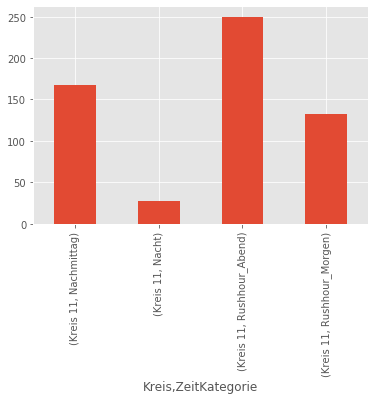

In [15]:
df4.iloc[df4.index.get_level_values('Kreis') == 'Kreis 11']['AccidentUID'].plot(kind="bar")
plt.show()

## 2.2) Barplot - Anzahl Unfälle verglichen mit der Verkehrszählung

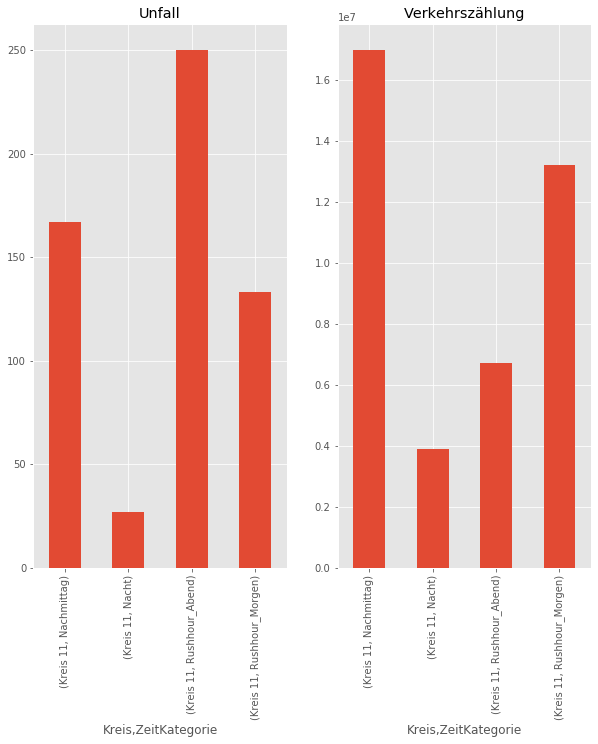

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
df4.iloc[df4.index.get_level_values('Kreis') == 'Kreis 11']['AccidentUID'].plot(ax=axes[0], kind='bar')
axes[0].set_title('Unfall')
df4.iloc[df4.index.get_level_values('Kreis') == 'Kreis 11']['AnzFahrzeuge'].plot(ax=axes[1], kind='bar')
axes[1].set_title('Verkehrszählung')
plt.show()